In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabl
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv and loading it
dataset=pd.read_csv("RTA Dataset.csv")

In [3]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


1 - Data Cleaning

In [4]:
#checking missing values
dataset.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [6]:
#dropping columns with high number of missing values
dataset.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality'], axis = 1, inplace = True)

In [8]:
dataset.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [11]:
categorical = []
for i in dataset.columns:
    if(dataset[i].dtype=="object"):
        categorical.append(i)

print('The categorical variables are',categorical)

The categorical variables are ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [12]:
#for categorical values we can replace the null values with Unknown
for i in categorical:
    dataset[i].fillna('Unknown',inplace=True)

In [13]:
#now no null values should be in cols
dataset.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [14]:
#checking col driving experience
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [19]:
for index, row in dataset.loc[:, ['Driving_experience']].iterrows():
    if(row['Driving_experience']=='unknown'):
        dataset.loc[index, 'Driving_experience'] = 'Unknown'

In [20]:
#removed small case unknowns
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr'], dtype=object)

In [21]:
#checking col Type_of_vehicle
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', 'Unknown',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [22]:
#cleaning type of vehicle column
for index, row in dataset.loc[:, ['Type_of_vehicle']].iterrows():
    if(row['Type_of_vehicle']=='Public (> 45 seats)' or row['Type_of_vehicle']=='Public (12 seats)' or row['Type_of_vehicle']=='Public (13?45 seats)'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Public'
    if(row['Type_of_vehicle']=='Lorry (41?100Q)' or row['Type_of_vehicle']=='Lorry (11?40Q)' or row['Type_of_vehicle']=='Long lorry'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Lorry'

In [23]:
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public', 'Lorry', 'Unknown', 'Taxi',
       'Pick up upto 10Q', 'Stationwagen', 'Ridden horse', 'Other',
       'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle', 'Bicycle'],
      dtype=object)

In [26]:
#cleaning keyword na from rows to Unknown
for col in dataset.columns:
    for index, row in dataset.loc[:, [col]].iterrows():
        if(row[col]=='na'):
            dataset.loc[index, col] = 'Unknown'

In [27]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2023-10-04 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury
1,2023-10-04 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury
2,2023-10-04 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2023-10-04 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2023-10-04 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury


In [28]:
# convert object type column into datetime datatype column
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [29]:
dataframe = dataset.copy()
dataframe['Hour_of_Day'] = dataframe['Time'].dt.hour
dataframe = dataframe.drop('Time', axis=1)
dataframe.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Unknown,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,Undivided Two way,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,other,...,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,other,...,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,other,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1


2 - Data Exploration

In [30]:
#Target Variable Classification
print(dataframe['Accident_severity'].value_counts())

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


In [37]:
dataframe['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

Target looks like classification
Linear Discriminant Analysis training set score: 0.333
Showing only top 10 of 29 categorical features


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 [array([[<AxesSubplot: ylabel='Number_of_casualties'>, <AxesSubplot: >],
         [<AxesSubplot: xlabel='Number_of_casualties', ylabel='Hour_of_Day'>,
          <AxesSubplot: xlabel='Hour_of_Day'>]], dtype=object),
  <Figure size 800x400 with 2 Axes>,
  <Figure size 400x400 with 1 Axes>],
 array([[<AxesSubplot: title={'center': 'Number_of_vehicles_involved'}>,
         <AxesSubplot: title={'center': 'Types_of_Junction'}>,
         <AxesSubplot: title={'center': 'Age_band_of_driver'}>,
         <AxesSubplot: title={'center': 'Weather_conditions'}>,
         <AxesSubplot: title={'center': 'Cause_of_accident'}>],
        [<AxesSubplot: title={'center': 'Day_of_week'}>,
         <AxesSubplot: title={'center': 'Area_accident_occured'}>,
         <AxesSubplot: title={'center': 'Light_conditions'}>,
         <AxesSubplot: title={'center': 'Type_of_vehicle'}>,
         <AxesSubplot: title={'ce

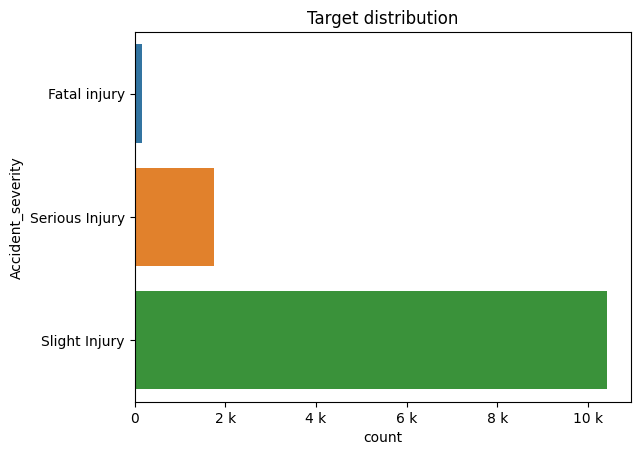

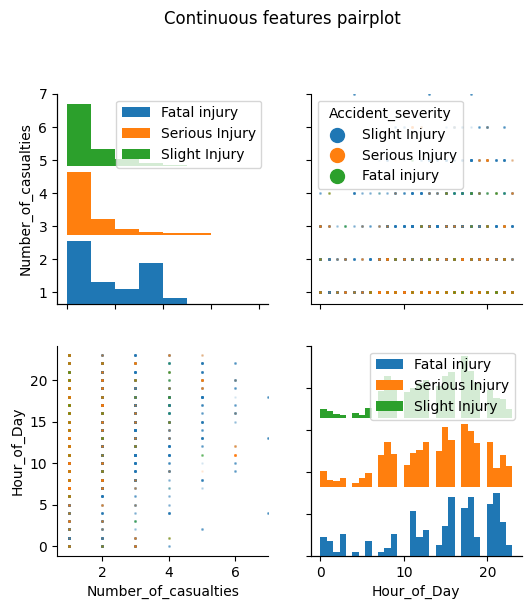

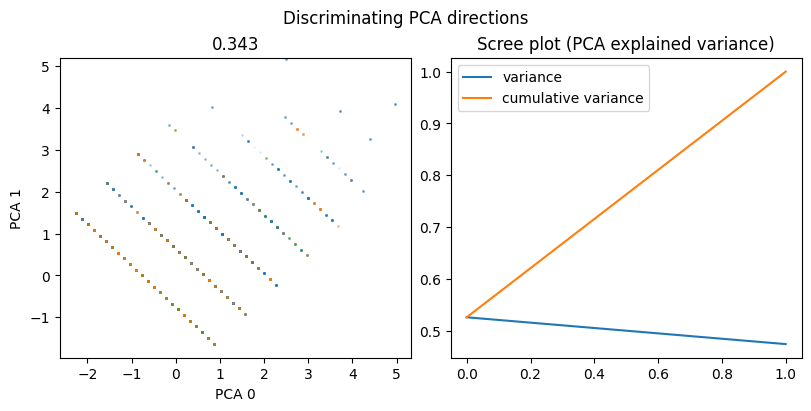

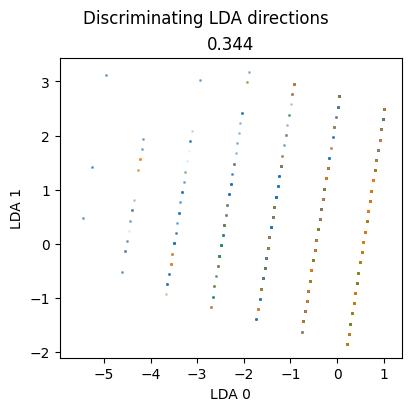

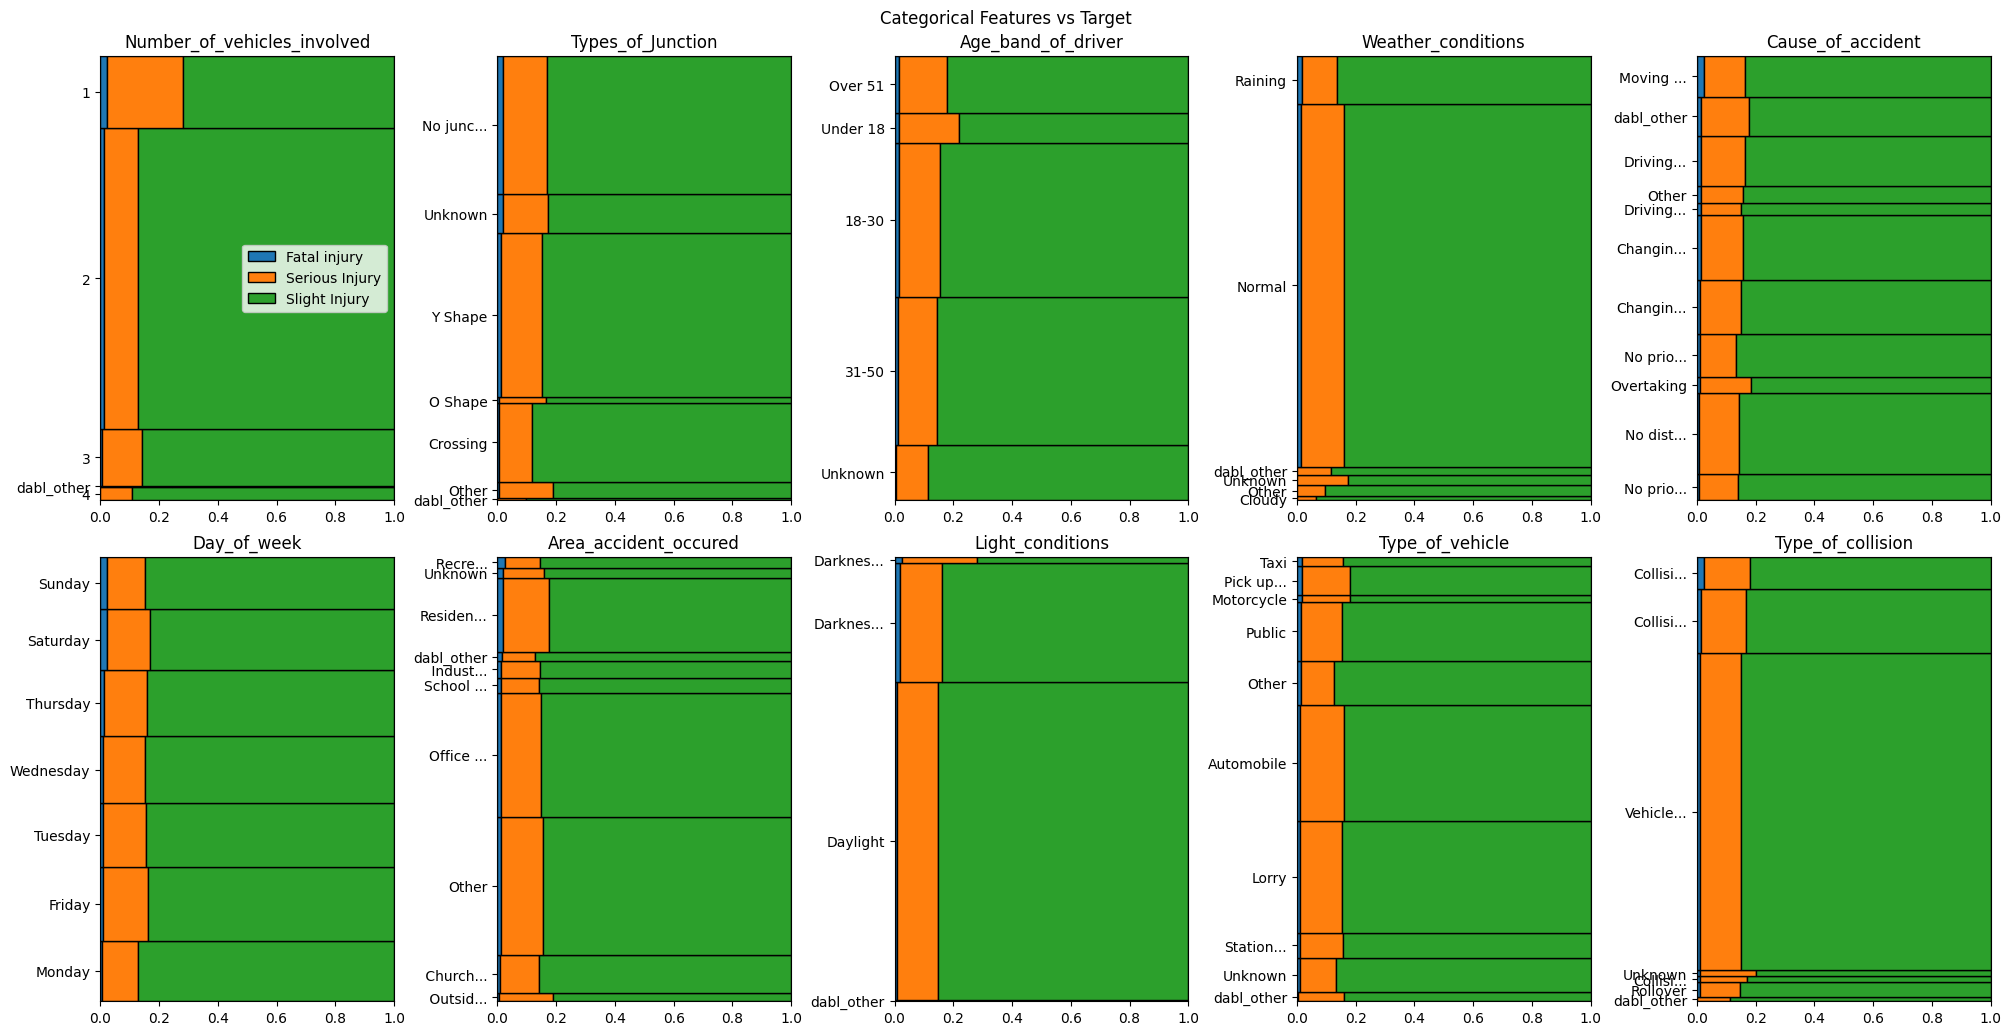

In [36]:
dabl.plot(dataframe, target_col='Accident_severity')

1) Data is highly imbalanced
2) Features like area_accident_occured, Cause_of_accident, Day_of_week, type_of_junction seem to be essential features causing fatal injuries
3) Road_surface and road conditions do not affect severe or fatal accidents apparently